In [2]:
%matplotlib inline

# 2.2 深度学习基础及数学原理
深度学习并没有想象的那么难，甚至比有些传统的机器学习更简单。所用到的数学知识也不需要特别的高深，本章将会一边讲解深度学习中的基本理论，一边通过动手使用PyTorch实现一些简单的理论，本章内容很多，所以只做一个简短的介绍


## 2.2.1 监督学习和无监督学习
监督学习、无监督学习、半监督学习、强化学习是我们日常接触到的常见的四个机器学习方法：

- 监督学习：通过已有的训练样本（即已知数据以及其对应的输出）去训练得到一个最优模型（这个模型属于某个函数的集合，最优则表示在某个评价准则下是最佳的），再利用这个模型将所有的输入映射为相应的输出。
- 无监督学习：它与监督学习的不同之处，在于我们事先没有任何训练样本，而需要直接对数据进行建模。 
- 半监督学习 ：在训练阶段结合了大量未标记的数据和少量标签数据。与使用所有标签数据的模型相比，使用训练集的训练模型在训练时可以更为准确。
- 强化学习：我们设定一个回报函数（reward function），通过这个函数来确认否越来越接近目标，类似我们训练宠物，如果做对了就给他奖励，做错了就给予惩罚，最后来达到我们的训练目的。

这里我们只着重介绍监督学习，因为我们后面的绝大部们课程都是使用的监督学习的方法，在训练和验证时输入的数据既包含输入x，又包含x对应的输出y，即学习数据已经事先给出了正确答案。

## 2.2.2 线性回归 （Linear Regreesion）
线性回归是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法，运用十分广泛。其表达形式为y = w'x+e，e为误差服从均值为0的正态分布。 

回归分析中，只包括一个自变量和一个因变量，且二者的关系可用一条直线近似表示，这种回归分析称为一元线性回归分析。如果回归分析中包括两个或两个以上的自变量，且因变量和自变量之间是线性关系，则称为多元线性回归分析。
摘自[百度百科](https://baike.baidu.com/item/线性回归/8190345)

简单的说：
线性回归对于输入x与输出y有一个映射f，y=f(x),而f的形式为aX+b。其中a和b是两个可调的参数，我们训练的时候就是训练a，b这两个参数。

下面我们来用PyTorch的代码来做一个详细的解释

In [1]:
%pip install seaborn

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


Note: you may need to restart the kernel to use updated packages.


In [3]:
# 引用
# 注意，这里我们使用了一个新库叫 seaborn 如果报错找不到包的话请使用pip install seaborn 来进行安装
import torch
from torch.nn import Linear, Module, MSELoss
from torch.optim import SGD
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
torch.__version__

'2.1.2+cu121'

下面定义一个线性函数，这里使用 $y = 5x + 7$，这里的5和7就是上面说到的参数a和b，我们先使用matplot可视化一下这个函数

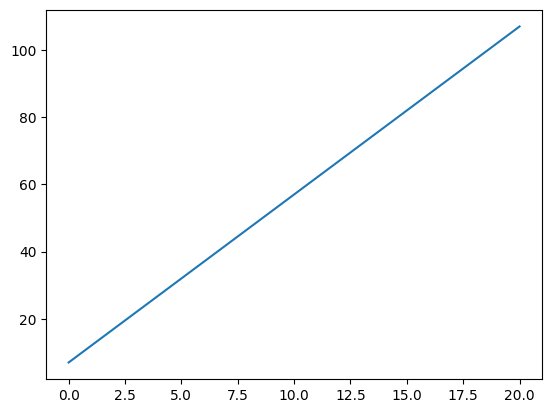

In [4]:
x = np.linspace(0,20,500)
y = 5*x + 7
plt.plot(x,y)

下面我生成一些随机的点，来作为我们的训练数据

In [5]:
x = np.random.rand(256)
noise = np.random.randn(256) / 4
y = x * 5 + 7 + noise
df = pd.DataFrame()
df['x'] = x
df['y'] = y

在图上显示下我们生成的数据

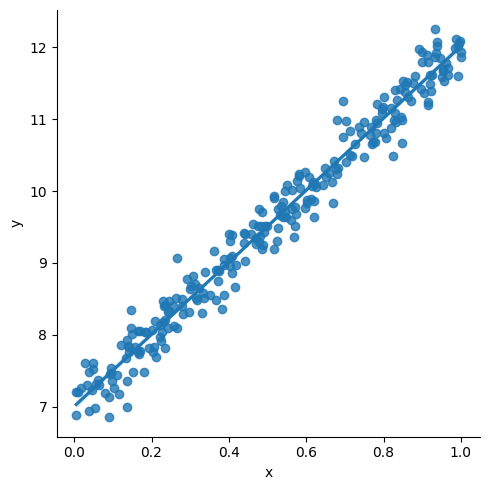

In [6]:
sns.lmplot(x='x', y='y', data=df);

我们随机生成了一些点，下面将使用PyTorch建立一个线性的模型来对其进行拟合，这就是所说的训练的过程，由于只有一层线性模型，所以我们就直接使用了

In [7]:
model=Linear(1, 1)

其中参数(1, 1)代表输入输出的特征(feature)数量都是1. `Linear` 模型的表达式是 $y=w \cdot x+b$，其中 $w$ 代表权重， $b$ 代表偏置

损失函数我们使用均方损失函数：`MSELoss`，这个后面会详细介绍

In [8]:
criterion = MSELoss()

优化器我们选择最常见的优化方法 `SGD`，就是每一次迭代计算 `mini-batch` 的梯度，然后对参数进行更新，学习率 0.01 ，优化器本章后面也会进行介绍

In [9]:
optim = SGD(model.parameters(), lr = 0.01)

训练3000次

In [10]:
epochs = 3000

准备训练数据: `x_train`, `y_train` 的形状是 (256, 1)， 代表 `mini-batch` 大小为256， `feature` 为1. `astype('float32')` 是为了下一步可以直接转换为 `torch.float`.

In [11]:
x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

开始训练了

In [12]:
for i in range(epochs):
    # 整理输入和输出的数据，这里输入和输出一定要是torch的Tensor类型
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    #使用模型进行预测
    outputs = model(inputs)
    #梯度置0，否则会累加
    optim.zero_grad()
    # 计算损失
    loss = criterion(outputs, labels)
    # 反向传播
    loss.backward()
    # 使用优化器默认方法优化
    optim.step()
    if (i%100==0):
        #每 100次打印一下损失函数，看看效果
        print('epoch {}, loss {:1.4f}'.format(i,loss.data.item()))       

epoch 0, loss 90.1221
epoch 100, loss 0.5978
epoch 200, loss 0.0850
epoch 300, loss 0.0767
epoch 400, loss 0.0725
epoch 500, loss 0.0693
epoch 600, loss 0.0668
epoch 700, loss 0.0649
epoch 800, loss 0.0635
epoch 900, loss 0.0624
epoch 1000, loss 0.0615
epoch 1100, loss 0.0609
epoch 1200, loss 0.0604
epoch 1300, loss 0.0600
epoch 1400, loss 0.0597
epoch 1500, loss 0.0594
epoch 1600, loss 0.0593
epoch 1700, loss 0.0591
epoch 1800, loss 0.0590
epoch 1900, loss 0.0590
epoch 2000, loss 0.0589
epoch 2100, loss 0.0588
epoch 2200, loss 0.0588
epoch 2300, loss 0.0588
epoch 2400, loss 0.0588
epoch 2500, loss 0.0587
epoch 2600, loss 0.0587
epoch 2700, loss 0.0587
epoch 2800, loss 0.0587
epoch 2900, loss 0.0587


训练完成了，看一下训练的成果是多少。用 `model.parameters()` 提取模型参数。 $w$， $b$ 是我们所需要训练的模型参数
我们期望的数据 $w=5$，$b=7$ 可以做一下对比

In [13]:
[w, b] = model.parameters()
print (w.item(),b.item())

4.99509859085083 7.012420654296875


再次可视化一下我们的模型，看看我们训练的数据，如果你不喜欢seaborn，可以直接使用matplot

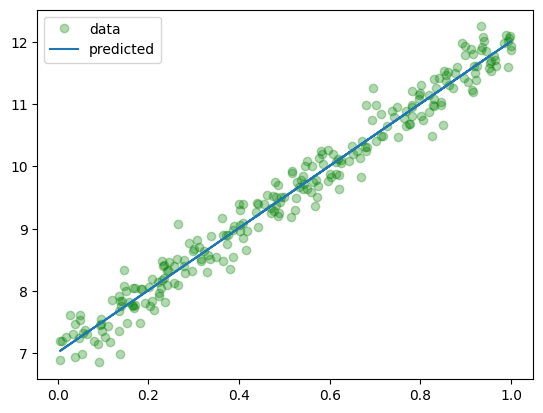

In [14]:
predicted = model.forward(torch.from_numpy(x_train)).data.numpy()
plt.plot(x_train, y_train, 'go', label = 'data', alpha = 0.3)
plt.plot(x_train, predicted, label = 'predicted', alpha = 1)
plt.legend()
plt.show()

以上就是一个使用PyTorch做线性回归的简单样例了，下面我们会对上面的内容做详细的介绍
##  2.2.3 损失函数(Loss Function)
损失函数（loss function）是用来估量模型的预测值(我们例子中的output)与真实值（例子中的y_train）的不一致程度，它是一个非负实值函数，损失函数越小，模型的鲁棒性就越好。
我们训练模型的过程，就是通过不断的迭代计算，使用梯度下降的优化算法，使得损失函数越来越小。损失函数越小就表示算法达到意义上的最优。

这里有一个重点：因为PyTorch是使用mini-batch来进行计算的，所以损失函数的计算出来的结果已经对mini-batch取了平均

常见（PyTorch内置）的损失函数有以下几个：
### nn.L1Loss:
输入x和目标y之间差的绝对值，要求 x 和 y 的维度要一样（可以是向量或者矩阵），得到的 loss 维度也是对应一样的

$ loss(x,y)=1/n\sum|x_i-y_i| $


### nn.NLLLoss:
用于多分类的负对数似然损失函数

$ loss(x, class) = -x[class]$

NLLLoss中如果传递了weights参数，会对损失进行加权，公式就变成了

$ loss(x, class) = -weights[class] * x[class] $

### nn.MSELoss:
均方损失函数 ，输入x和目标y之间均方差

$ loss(x,y)=1/n\sum(x_i-y_i)^2 $

### nn.CrossEntropyLoss:
多分类用的交叉熵损失函数，LogSoftMax和NLLLoss集成到一个类中，会调用nn.NLLLoss函数，我们可以理解为CrossEntropyLoss()=log_softmax() + NLLLoss()


 $ \begin{aligned} loss(x, class) &= -\text{log}\frac{exp(x[class])}{\sum_j exp(x[j]))}\ &= -x[class] + log(\sum_j exp(x[j])) \end{aligned}  $
 
 因为使用了NLLLoss，所以也可以传入weight参数，这时loss的计算公式变为：
 
 $ loss(x, class) = weights[class] * (-x[class] + log(\sum_j exp(x[j]))) $
 
 所以一般多分类的情况会使用这个损失函数

### nn.BCELoss:
计算 x 与 y 之间的二进制交叉熵。

$ loss(o,t)=-\frac{1}{n}\sum_i(t[i]* log(o[i])+(1-t[i])* log(1-o[i])) $ 

与NLLLoss类似，也可以添加权重参数： 

$ loss(o,t)=-\frac{1}{n}\sum_iweights[i]* (t[i]* log(o[i])+(1-t[i])* log(1-o[i])) $

用的时候需要在该层前面加上 Sigmoid 函数。

## 2.2.4 梯度下降
在介绍损失函数的时候我们已经说了，梯度下降是一个使损失函数越来越小的优化算法，在无求解机器学习算法的模型参数，即约束优化问题时，梯度下降（Gradient Descent）是最常采用的方法之一。所以梯度下降是我们目前所说的机器学习的核心，了解了它的含义，也就了解了机器学习算法的含义。


### 梯度
在微积分里面，对多元函数的参数求∂偏导数，把求得的各个参数的偏导数以向量的形式写出来，就是梯度。
例如函数f(x,y), 分别对x，y求偏导数，求得的梯度向量就是(∂f/∂x, ∂f/∂y)T，简称grad f(x,y)或者▽f(x,y)。

几何上讲，梯度就是函数变化增加最快的地方，沿着梯度向量的方向，更加容易找到函数的最大值。反过来说，沿着梯度向量相反的方向梯度减少最快，也就是更加容易找到函数的最小值。

我们需要最小化损失函数，可以通过梯度下降法来一步步的迭代求解，得到最小化的损失函数，和模型参数值。
### 梯度下降法直观解释
梯度下降法就好比下山，我们并不知道下山的路，于是决定走一步算一步，每走到一个位置的时候，求解当前位置的梯度，沿着梯度的负方向，也就是当前最陡峭的位置向下走一步，然后继续求解当前位置梯度，向这一步所在位置沿着最陡峭最易下山的位置走一步。这样一步步的走下去，一直走到觉得我们已经到了山脚。

如下图所示，（此图摘自百度百科）
![](1.png)

这样走下去，有可能我们不能走到山脚，而是到了某一个局部的山峰低处（局部最优解）。

这个问题在以前的机器学习中可能会遇到，因为机器学习中的特征比较少，所以导致很可能陷入到一个局部最优解中出不来，但是到了深度学习，动辄百万甚至上亿的特征，出现这种情况的概率几乎为0，所以我们可以不用考虑这个问题。

### Mini-batch的梯度下降法
对整个训练集进行梯度下降法的时候，我们必须处理整个训练数据集，然后才能进行一步梯度下降，即每一步梯度下降法需要对整个训练集进行一次处理，如果训练数据集很大的时候处理速度会很慢，而且也不可能一次的载入到内存或者显存中，所以我们会把大数据集分成小数据集，一部分一部分的训练，这个训练子集即称为Mini-batch。
在PyTorch中就是使用这种方法进行的训练，可以看看上一章中关于dataloader的介绍里面的batch_size就是我们一个Mini-batch的大小。

为了介绍的更简洁，使用 吴恩达老师的 [deeplearning.ai](https://www.deeplearning.ai/deep-learning-specialization/) 课程板书。


对于普通的梯度下降法，一个epoch只能进行一次梯度下降；而对于Mini-batch梯度下降法，一个epoch可以进行Mini-batch的个数次梯度下降。
![](2.png)
普通的batch梯度下降法和Mini-batch梯度下降法代价函数的变化趋势，如下图所示：
![](3.png)
- 如果训练样本的大小比较小时，能够一次性的读取到内存中，那我们就不需要使用Mini-batch，
- 如果训练样本的大小比较大时，一次读入不到内存或者现存中，那我们必须要使用 Mini-batch来分批的计算
- Mini-batch size的计算规则如下，在内存允许的最大情况下使用2的N次方个size
![](4.png)


`torch.optim`是一个实现了各种优化算法的库。大部分常用优化算法都有实现，我们直接调用即可。
### torch.optim.SGD
随机梯度下降算法，带有动量（momentum）的算法作为一个可选参数可以进行设置，样例如下：

In [15]:
#lr参数为学习率，对于SGD来说一般选择0.1 0.01.0.001，如何设置会在后面实战的章节中详细说明
##如果设置了momentum，就是带有动量的SGD，可以不设置
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

### torch.optim.RMSprop
除了以上的带有动量Momentum梯度下降法外，RMSprop（root mean square prop）也是一种可以加快梯度下降的算法，利用RMSprop算法，可以减小某些维度梯度更新波动较大的情况，使其梯度下降的速度变得更快

In [16]:
#我们的课程基本不会使用到RMSprop所以这里只给一个实例
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99)

### torch.optim.Adam
Adam 优化算法的基本思想就是将 Momentum 和 RMSprop 结合起来形成的一种适用于不同深度学习结构的优化算法

In [17]:
# 这里的lr，betas，还有eps都是用默认值即可，所以Adam是一个使用起来最简单的优化方法
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

## 2.2.5 方差/偏差
- 偏差度量了学习算法的期望预测与真实结果的偏离程序，即刻画了学习算法本身的拟合能力
- 方差度量了同样大小的训练集的变动所导致的学习性能的变化，即模型的泛化能力
![](5.png)

从图中我们可以看出
- 高偏差（high bias）的情况，一般称为欠拟合（underfitting），即我们的模型并没有很好的去适配现有的数据，拟合度不够。
- 高方差（high variance）的情况一般称作过拟合（overfitting），即模型对于训练数据拟合度太高了，失去了泛化的能力。

如何解决这两种情况呢？

欠拟合：
- 增加网络结构，如增加隐藏层数目；
- 训练更长时间；
- 寻找合适的网络架构，使用更大的NN结构；

过拟合 ：
- 使用更多的数据；
- 正则化（ regularization）；
- 寻找合适的网络结构；

例如我们上面的例子，可以计算出我们的偏差:

In [18]:
print (5-w.data.item(),7-b.data.item())

0.004901409149169922 -0.012420654296875


## 2.2.6 正则化
利用正则化来解决High variance 的问题，正则化是在 Cost function 中加入一项正则化项，惩罚模型的复杂度，这里我们简单的介绍一下正则化的概念

### L1正则化
损失函数基础上加上权重参数的绝对值

$ L=E_{in}+\lambda{\sum_j} \left|w_j\right|$

### L2正则化
损失函数基础上加上权重参数的平方和

$ L=E_{in}+\lambda{\sum_j} w^2_j$

需要说明的是：l1 相比于 l2 会更容易获得稀疏解

[知乎](https://www.zhihu.com/question/37096933/answer/70507353)